In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.analysis import Txt_Reading
import pandas as pd
import os
from tqdm.notebook import tqdm as tqdm

%matplotlib inline

In [2]:
folder = "1nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = f_MAX[2]
reading = Txt_Reading(folder, f_max)

100%|██████████| 5/5 [00:00<00:00, 4187.60it/s]

All trajectories have already been categorized


In [3]:
# to_do = {
#     2: {
#         2:'f',
#         3:'f',
#         4:'f',
#         5: 'f',
#         6: 'f',
#         7: 'f',
#         8: 'f',
#         9: 'f',
#         20: 'f'
#     },
#     18:{
#         46: 'u'
#     },
#     21:{
#         8: 'u'
#     },
#     22:{
#         1: 'f'
#     }    
# }

In [4]:
# for mol in to_do.keys():
#     for numb, type in to_do[mol].items():
#         file = reading.readTxt(number=mol, N=numb, ty=type, graph=True)

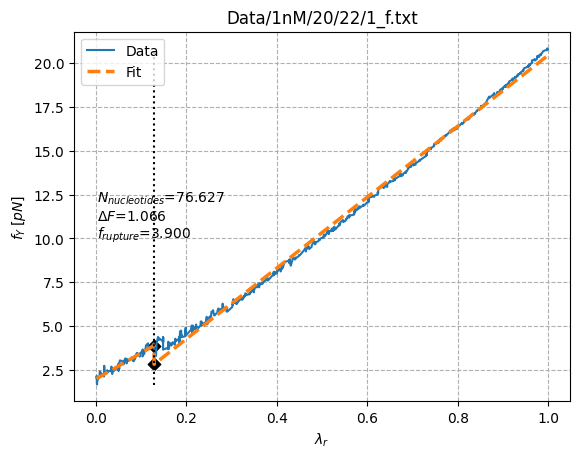

In [5]:
file = reading.readTxt(number=22, N=1, ty='f', graph=True)

In [6]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.899786,2.833518,22.492817,76.626658,0.049698,4.12437,0.128273,14.830395,1.997446,20.183184,0.244559,2


In [7]:
reading.f_rupture, reading.f_rupture_next 

([np.float64(3.899786331064094)], [np.float64(2.833518015512704)])

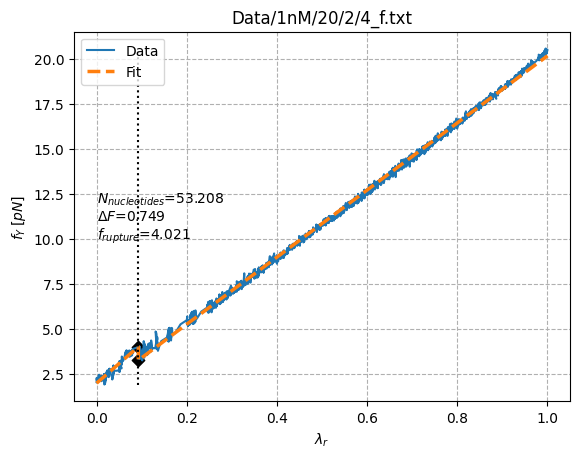

In [8]:
file = reading.readTxt(number=2, N=4, ty='f', graph=True)

In [9]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.020852,3.272064,15.852453,53.208112,0.050617,3.91797,0.092651,21.822751,1.998952,18.603174,1.548461,2


In [10]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [11]:
reading.f_rupture, reading.f_rupture_next

([np.float64(4.020851510187825)], [np.float64(3.272063964842238)])

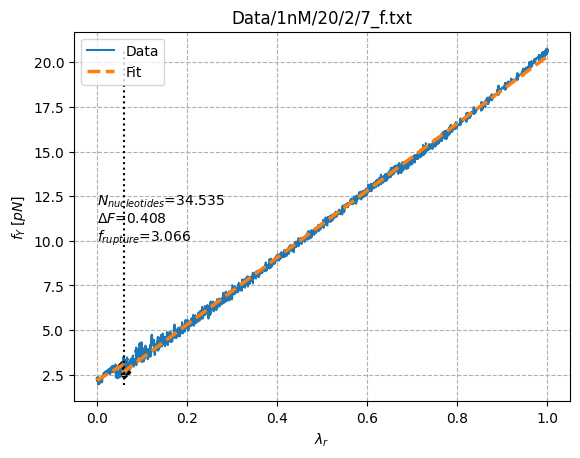

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.066383,2.658258,8.916408,34.534791,0.050739,4.16406,0.05978,14.804131,2.181396,18.794457,1.53473,2


In [12]:
file = reading.readTxt(number=2, N=7, ty='f', graph=True)
reading.params_df

In [13]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

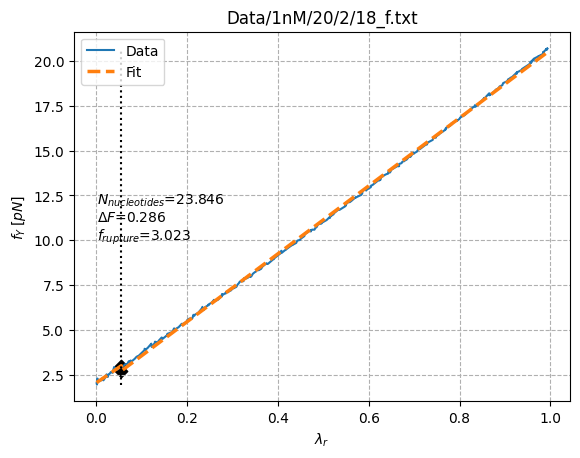

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.023083,2.736985,6.106366,23.846449,0.054566,3.68359,0.055039,17.145463,2.079407,18.891944,1.697184,2


In [14]:
file = reading.readTxt(number=2, N=18, ty='f', graph=True)
reading.params_df

In [ ]:
from scipy.signal import savgol_filter
F_smooth = savgol_filter(reading.force_Y, window_length=11, polyorder=2)
dF = np.diff(F_smooth)/np.diff(reading.λ)  # ∼ ΔF tra campioni
from scipy.signal import find_peaks
find_peaks(dF, height=10, distance=10)#.max()

(array([ 25,  45,  76,  99, 118, 133, 151, 163, 175, 190, 201, 221, 243,
        258, 276, 295, 313, 324, 339]),
 {'peak_heights': array([ 531.78690979,  419.27657802,  112.10566927, 7588.99443932,
          169.93446232,  175.76843315,  354.95896662,  119.17917574,
          562.3055892 , 1472.21657154,  541.24625112,  771.6196487 ,
         1555.00184859,  174.50050978,  168.05768731,  100.3667006 ,
          155.09157293,  138.14124312,  266.25856645])})

New: [0.0046785  0.01550543 0.02496835 0.03193649 0.03904629 0.04680208
 0.05503941 0.06278776 0.06681703 0.07265049 0.08813744 0.09156702
 0.1062965  0.10818019 0.12108202 0.12222059 0.12891333 0.13694595
 0.15545306 0.15634953 0.17127101 0.17246244 0.18823012 0.1987571
 0.20022718 0.20602902 0.21376321 0.21725518 0.22505552 0.23438731
 0.24690369 0.25916705 0.27497994 0.27609447 0.28577928 0.29208766
 0.29612646 0.30838268 0.31349861 0.31676313 0.32771187 0.33506409
 0.34465287 0.35116761 0.35724752 0.37474011 0.38663311 0.38944908
 0.40630385 0.40752785 0.40769465 0.41834575 0.43152912 0.43710472
 0.44344696 0.45014707 0.47099184 0.47286888 0.48038912 0.48843193
 0.50715285 0.51388811 0.51735063 0.52288955 0.5472268  0.5502695
 0.57034439 0.5709344  0.5849109  0.58619237 0.59608175 0.60818358
 0.60954362 0.62349954 0.62752311 0.63244531 0.63886676 0.64339167
 0.64977846 0.66544007 0.66693232 0.67405137 0.68003611 0.69099785
 0.69156353 0.69875623 0.70806362 0.71282458 0.72747744 0.7

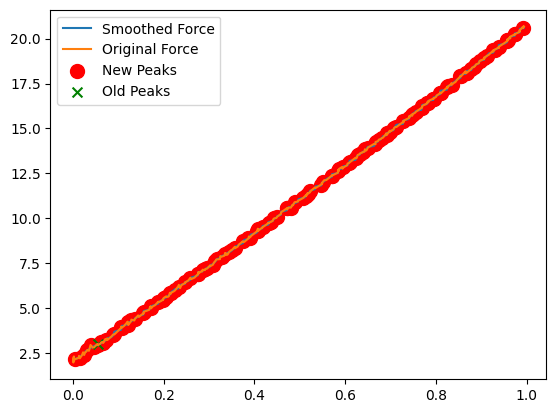

In [27]:
print("New:", reading.λ[find_peaks(dF, height=10)[0]-1], reading.force_Y[find_peaks(dF, height=10)[0]-1])
print("Old:", reading.λ_0, reading.f_rupture)
plt.plot(reading.λ, F_smooth, label='Smoothed Force')
plt.plot(reading.λ, reading.force_Y, label='Original Force')
plt.scatter(reading.λ[find_peaks(dF, height=10)[0]-1], reading.force_Y[find_peaks(dF, height=10)[0]-1], 
            marker="o", c="red", s=100, label='New Peaks')
plt.scatter(reading.λ_0, reading.f_rupture,
            marker="x", c="green", s=50, label='Old Peaks')
plt.legend()
plt.show()

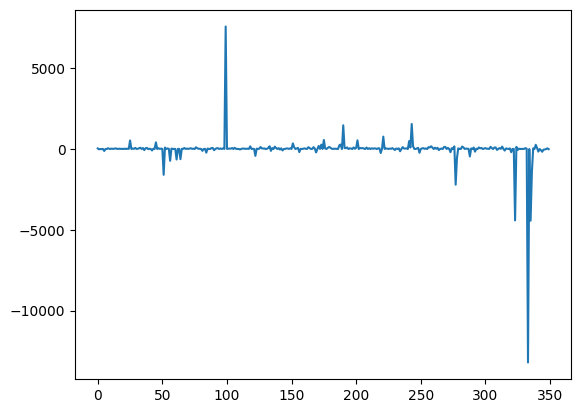

In [28]:
plt.plot(dF, label='ΔF between samples');

In [15]:
molecules, all_molecules_f, all_molecules_u = reading.seq_analysis_post_meta()

 20%|██        | 1/5 [1:22:27<5:29:49, 4947.45s/it]


Not saving file Data/1nM/20/12/12_u.txt



 40%|████      | 2/5 [2:23:35<3:29:43, 4194.60s/it]


Not saving file Data/1nM/20/18/28_f.txt


Not saving file Data/1nM/20/18/35_u.txt



 80%|████████  | 4/5 [3:36:30<44:28, 2668.79s/it]  


Not saving file Data/1nM/20/22/17_f.txt


Not saving file Data/1nM/20/22/18_f.txt


Not saving file Data/1nM/20/22/21_f.txt


Not saving file Data/1nM/20/22/22_f.txt


Not saving file Data/1nM/20/22/24_f.txt


Not saving file Data/1nM/20/22/27_f.txt


Not saving file Data/1nM/20/22/28_f.txt


Not saving file Data/1nM/20/22/8_u.txt


Not saving file Data/1nM/20/22/9_u.txt


Not saving file Data/1nM/20/22/10_u.txt


Not saving file Data/1nM/20/22/13_u.txt


Not saving file Data/1nM/20/22/15_u.txt


Not saving file Data/1nM/20/22/16_u.txt


Not saving file Data/1nM/20/22/17_u.txt


Not saving file Data/1nM/20/22/18_u.txt


Not saving file Data/1nM/20/22/19_u.txt


Not saving file Data/1nM/20/22/23_u.txt


Not saving file Data/1nM/20/22/24_u.txt


Not saving file Data/1nM/20/22/25_u.txt


Not saving file Data/1nM/20/22/26_u.txt


Not saving file Data/1nM/20/22/28_u.txt



100%|██████████| 5/5 [4:44:17<00:00, 3411.57s/it]


Saving results...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [ ]:
np.savez(f'res/{folder}/f_max{f_max}.npz', 
        molecules=molecules, 
        all_molecules_f=all_molecules_f, 
        all_molecules_u=all_molecules_u)

In [ ]:
res = np.load(f'res/{folder}/f_max{f_max}.npz', allow_pickle=True)
molecules = res['molecules']
all_molecules_u = res['all_molecules_u']
all_molecules_f = res['all_molecules_f']

In [14]:
keys = ['f_rupture', 'f_rupture_next', 'x_ssDNA', 'N', 'k_eff', 't_0', 'fileName']
# Create a dictionary with the data
data = {}
for ii, molecule in enumerate(molecules):
    U_dict = {}
    F_dict = {}
    
    for jj, el in enumerate(all_molecules_u[ii]):
        U_dict[jj+1] = dict(zip(keys, el[0]))
    
    for jj, el in enumerate(all_molecules_f[ii]):
        F_dict[jj+1] = dict(zip(keys, el[0]))
    
    data[molecule] = {'U': U_dict, 'F': F_dict}

In [15]:
data[molecules[-1]]['U']#['N']

{1: {'f_rupture': 4.118918155770086,
  'f_rupture_next': 3.1019383514329184,
  'x_ssDNA': 27.340324333105652,
  'N': 90.71863446217824,
  'k_eff': 0.038721161260454766,
  't_0': 4.2979700000000065,
  'fileName': 'Data/1nM/20/22/2_u.txt'},
 2: {'f_rupture': 3.9483977825847862,
  'f_rupture_next': 2.9626242152458593,
  'x_ssDNA': 26.722556526907947,
  'N': 90.48603314102724,
  'k_eff': 0.03839300120981951,
  't_0': 12.715670000000003,
  'fileName': 'Data/1nM/20/22/3_u.txt'},
 3: {'f_rupture': 4.220739648053841,
  'f_rupture_next': 3.2648455295735106,
  'x_ssDNA': 29.617453048415957,
  'N': 97.15688569633757,
  'k_eff': 0.03351152561568132,
  't_0': 21.263659999999987,
  'fileName': 'Data/1nM/20/22/4_u.txt'},
 4: {'f_rupture': 4.292022098701466,
  'f_rupture_next': 3.390140812094463,
  'x_ssDNA': 26.313536022038132,
  'N': 85.65442281429988,
  'k_eff': 0.035776444075594674,
  't_0': 29.413029999999992,
  'fileName': 'Data/1nM/20/22/5_u.txt'},
 5: {'f_rupture': 5.154979694067801,
  'f_rupt

In [16]:
metaFile = np.loadtxt(f'meta/{folder}/{f_max}/jumps.txt', dtype=str)

In [17]:
N_U = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['U'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}
N_F = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['F'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}

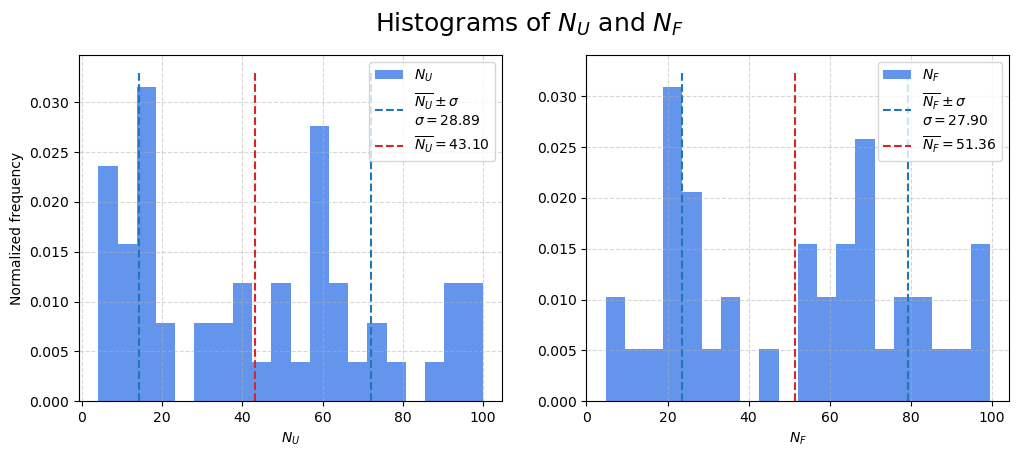

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot = [
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['U'].items() if value['fileName'] in metaFile]), 
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['F'].items() if value['fileName'] in metaFile])
]
labels = ['N_U', 'N_F']
for ii in range(2):
    ax[ii].hist(to_plot[ii], bins=20, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])+np.std(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot[ii][to_plot[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])-np.std(to_plot[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot[ii][to_plot[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $N_U$ and $N_F$', fontsize=18)
plt.show()

In [19]:
# Compute the percentage of elements outside the [mean-std, mean+std] confidence interval
failed_U = np.sum((to_plot[0] < np.mean(to_plot[0])-np.std(to_plot[0])) | (to_plot[0] > np.mean(to_plot[0])+np.std(to_plot[0])))/len(to_plot[0]) * 100
failed_F = np.sum((to_plot[1] < np.mean(to_plot[1])-np.std(to_plot[1])) | (to_plot[1] > np.mean(to_plot[1])+np.std(to_plot[1])))/len(to_plot[1]) * 100
print(f'Outliers in U: {failed_U:.2f}%\nOutliers in F: {failed_F:.2f}%')

Outliers in U: 37.74%
Outliers in F: 36.59%


In [20]:
# See an example of the failed_U trajectory
failed_U_dict = {}
failed_F_dict = {}

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['U'].items():
        if (values['N'] < np.mean(
            to_plot[0])-np.std(to_plot[0]) or values['N'] > np.mean(
                to_plot[0])+np.std(to_plot[0])) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_U_dict[mol] = failed

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['F'].items():
        if (values['N'] < np.mean(
            to_plot[1])-np.std(to_plot[1]) or values['N'] > np.mean(
                to_plot[1])+np.std(to_plot[1])) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_F_dict[mol] = failed

In [21]:
number_of_failed_anaylys_U = sum([len(sub_dic) for sub_dic in failed_U_dict.values()])
number_of_failed_anaylys_F = sum([len(sub_dic) for sub_dic in failed_F_dict.values()])

In [22]:
print(f'Percentage of outliers U (looking only at the # of nucleotides): {number_of_failed_anaylys_U/len(to_plot[0]) * 100:.2f}%')
print(f'Percentage of outliers F (looking only at the # of nucleotides): {number_of_failed_anaylys_F/len(to_plot[1]) * 100:.2f}%')

Percentage of outliers U (looking only at the # of nucleotides): 37.74%
Percentage of outliers F (looking only at the # of nucleotides): 36.59%


In [23]:
mean_N_U = np.mean(to_plot[0][to_plot[0] != 0])
std_N_U = np.std(to_plot[0][to_plot[0] != 0])
mean_N_F = np.mean(to_plot[1][to_plot[1] != 0])
std_N_F = np.std(to_plot[1][to_plot[1] != 0])

# outliers_U = np.where(np.abs(N_U - mean_N_U) > std_N_U)[0]
# outliers_F = np.where(np.abs(N_F - mean_N_F) > std_N_F)[0]

outliers_U = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['U'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}
outliers_F = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['F'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}

In [24]:
path_re_analyze_U = [traj for molecule in outliers_U.keys() for traj in outliers_U[molecule].keys()]
path_re_analyze_F = [traj for molecule in outliers_F.keys() for traj in outliers_F[molecule].keys()]

In [25]:
len(path_re_analyze_U), len(path_re_analyze_F)

(31, 28)

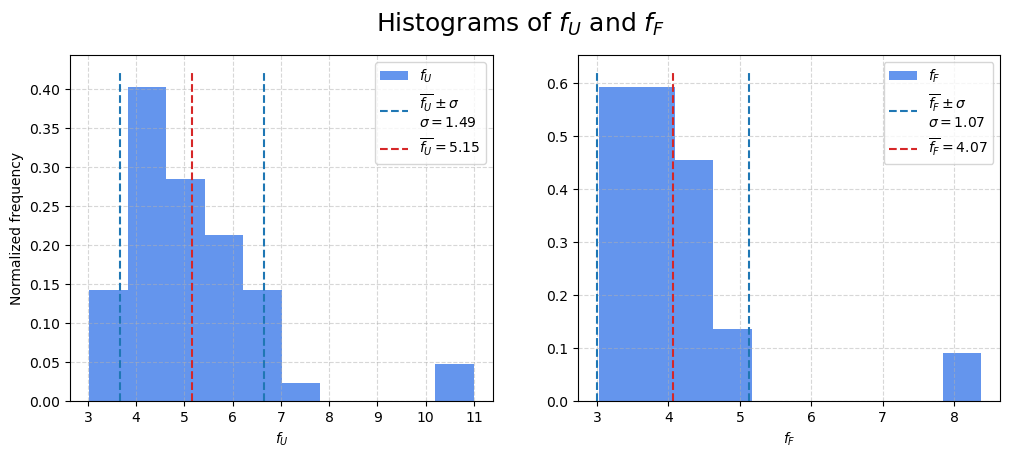

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_f_rupture = [
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['f_U', 'f_F']
for ii in range(2):
    ax[ii].hist(to_plot_f_rupture[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])+np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])-np.std(to_plot_f_rupture[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $f_U$ and $f_F$', fontsize=18)
plt.show()

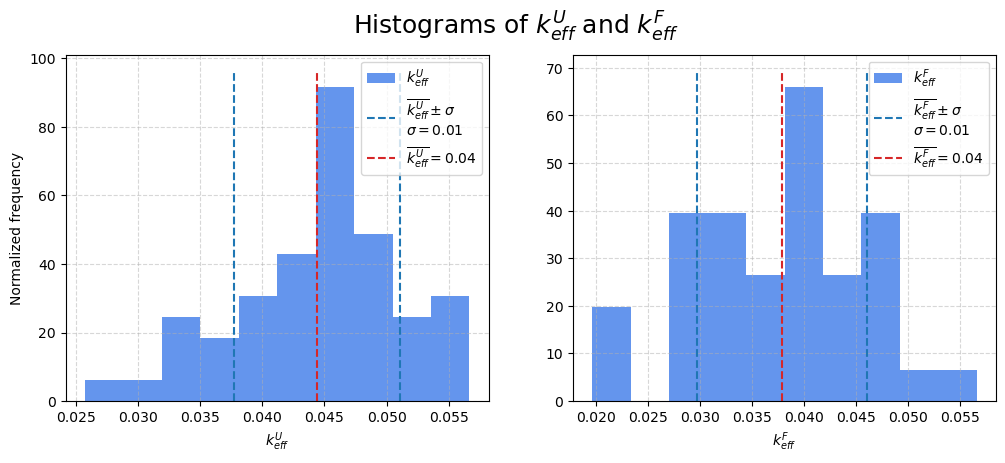

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_k_eff = [
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['k_{eff}^U', 'k_{eff}^F']
for ii in range(2):
    ax[ii].hist(to_plot_k_eff[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])+np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])-np.std(to_plot_k_eff[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $k_{eff}^U$ and $k_{eff}^F$', fontsize=18)
plt.show()

In [28]:
from sklearn.cluster import KMeans

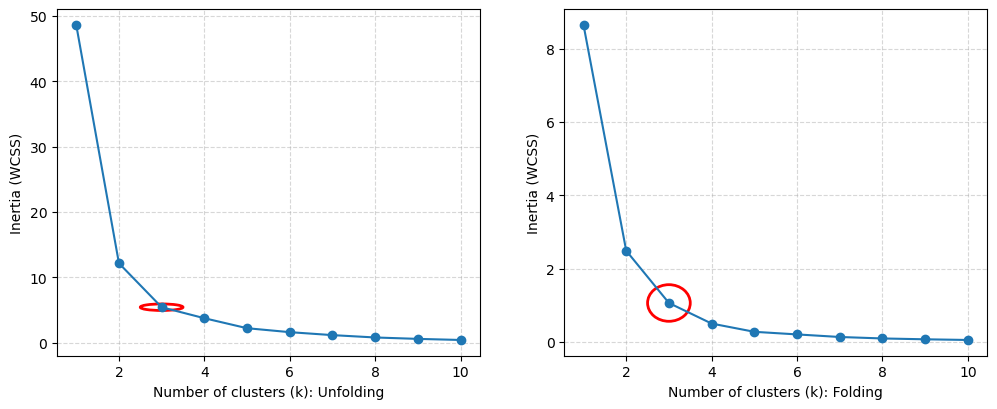

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['Unfolding', 'Folding']
for ii in range(2):
    inertia = []
    k_values = range(1, 11)
    mask = to_plot_f_rupture[ii] < 8
    X = np.concatenate((to_plot_f_rupture[ii][mask].reshape(-1, 1),
                        to_plot_k_eff[ii][mask].reshape(-1, 1)), axis=1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        inertia.append(kmeans.inertia_)
    ax[ii].plot(k_values, inertia, marker='o')
    ax[ii].set_xlabel(f'Number of clusters (k): {lab[ii]}')
    ax[ii].set_ylabel('Inertia (WCSS)')
    ax[ii].grid(ls='--', alpha=0.5)
    elbow_k = 3
    elbow_inertia = inertia[2]
    circle = plt.Circle((elbow_k, elbow_inertia), radius=0.5, 
                        color='red', fill=False, linewidth=2)
    ax[ii].add_patch(circle)

plt.show()

In [50]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)

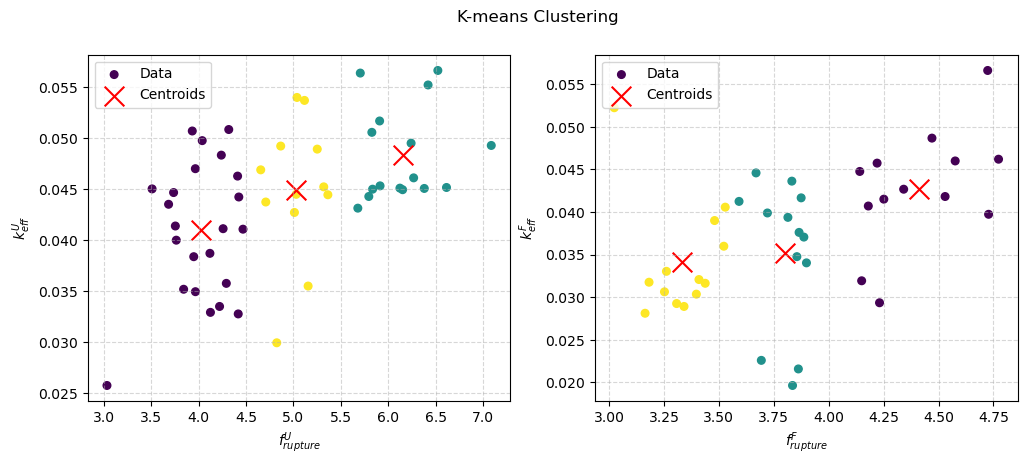

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['U', 'F']
for ii in range(2):
    mask = to_plot_f_rupture[ii] < 8
    X = np.concatenate((to_plot_f_rupture[ii][mask].reshape(-1, 1), 
                        to_plot_k_eff[ii][mask].reshape(-1, 1)), axis=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    ax[ii].scatter(X[:, 0], X[:, 1], s=30, c=labels, 
                cmap='viridis', label='Data')
    ax[ii].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
    ax[ii].set_xlabel('$f_{rupture}^{'+lab[ii]+'}$')
    ax[ii].set_ylabel("$k_{eff}^{"+lab[ii]+'}$')
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle("K-means Clustering")
plt.show()

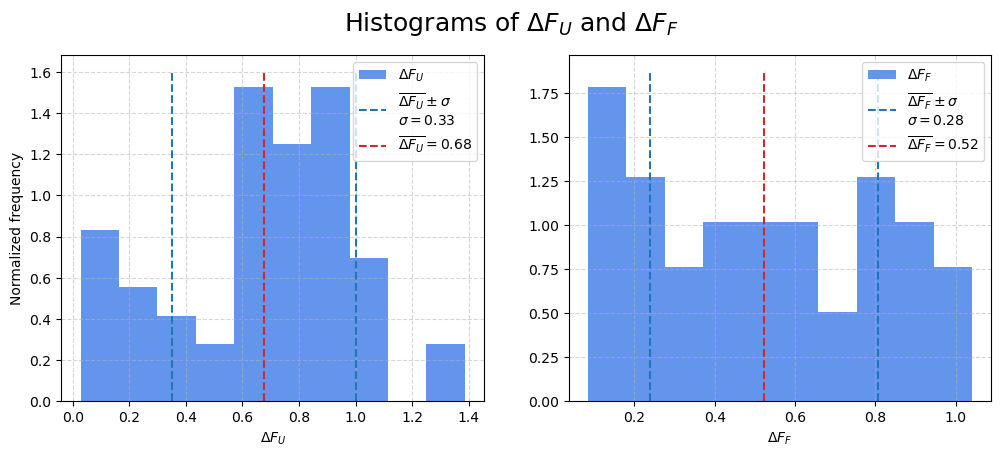

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_deltaF = [
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['\Delta F_{U}', '\Delta F_{F}']
for ii in range(2):
    ax[ii].hist(to_plot_deltaF[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])+np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])-np.std(to_plot_deltaF[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $\Delta F_{U}$ and $\Delta F_{F}$', fontsize=18)
plt.show()

In [36]:
np.where(to_plot_f_rupture[0]> 10) 

(array([33, 36], dtype=int64),)

In [33]:
fileNumb = 33

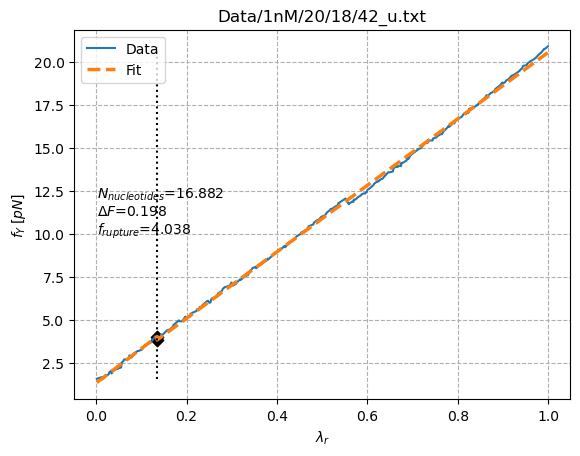

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   4.037857        3.839873  5.039807      16.881666  0.049776  0.04443   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.134987  20.028994  1.334199  19.339932  1.229229       2  


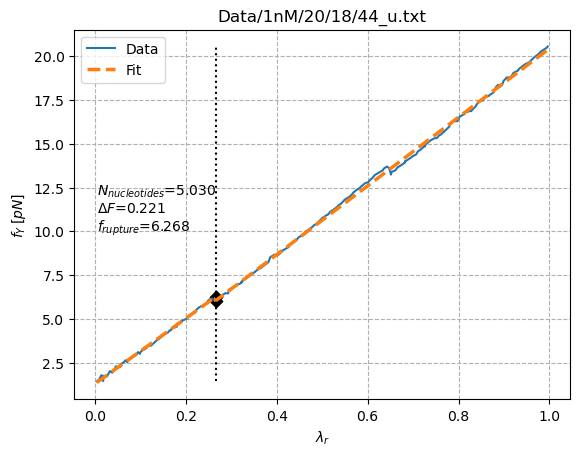

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.268317        6.047649  6.137401       5.030026  0.046125  0.06348   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.265873  18.686896  1.299973  19.599265  0.836731       2  


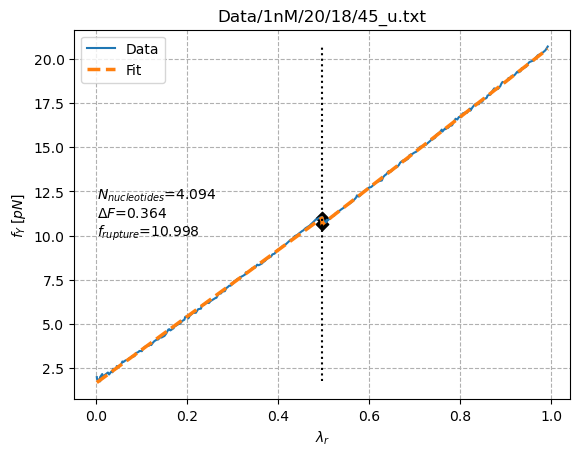

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0  10.997906        10.63389  9.097333       4.093965  0.048724  0.14258   

       λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.49614  18.840713  1.650275  20.040814  0.690841       2  


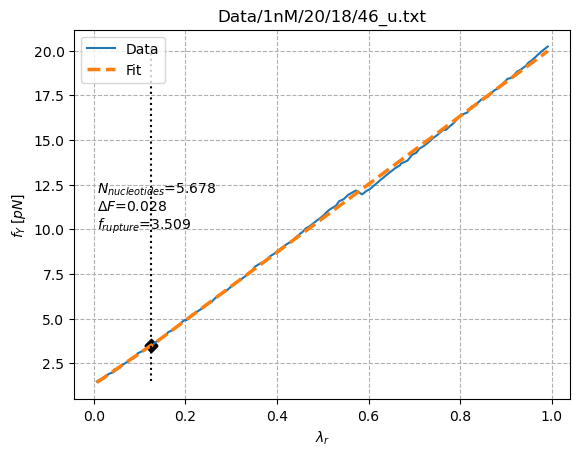

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   3.508925        3.481245  1.579228       5.677684  0.045041  0.02344   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.125163  17.533455  1.314377  19.036544  1.098565       2  


In [37]:
for ii, element in enumerate(path_re_analyze_U):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='u', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

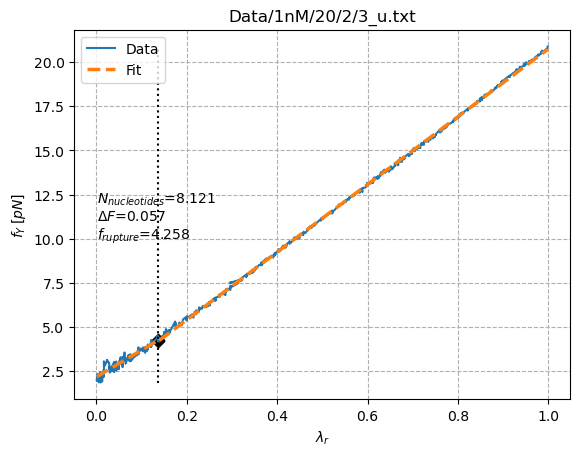

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides    k_eff      t_0  \
0    4.25809        4.201046  2.485845       8.121376  0.04114  0.16699   

       λ_0      a_pre     b_pre    a_post    b_post  N_fits  
0  0.13667  15.152985  2.187128  19.16124  1.582274       2  


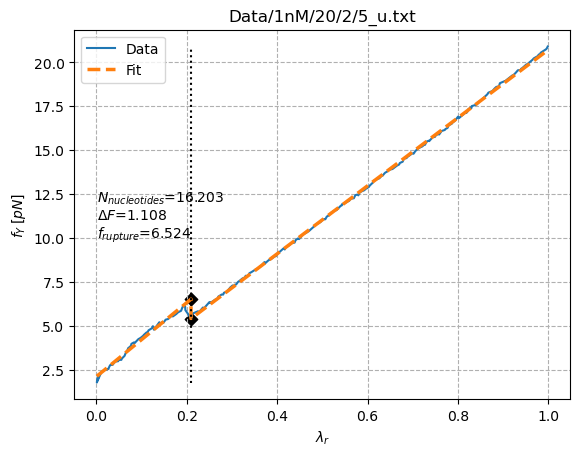

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.523673        5.416072  20.925953       16.20324  0.056658  0.06446   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.209459  21.035437  2.117605  19.357935  1.361373       2  


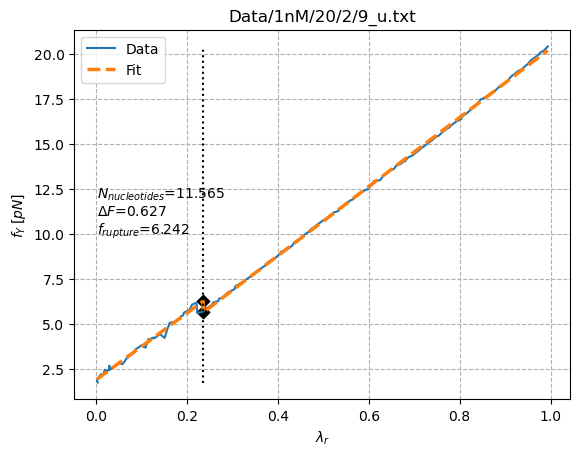

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.241531        5.614265  14.016205      11.565162  0.049526  0.04297   

        λ_0      a_pre     b_pre    a_post    b_post  N_fits  
0  0.235768  18.562085  1.865178  19.21466  1.084056       2  


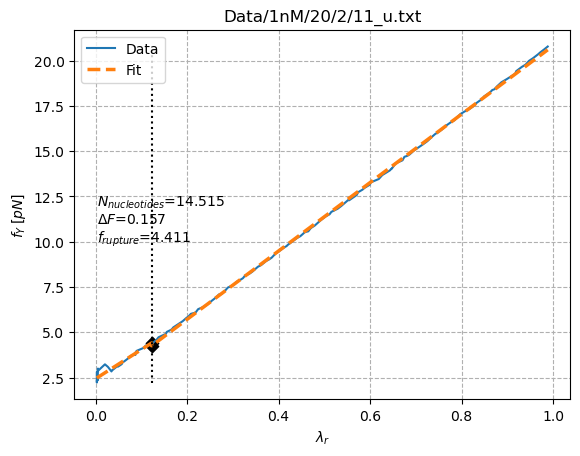

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   4.411111        4.254107  4.514887      14.515206  0.046297  0.02539   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.122233  16.104327  2.442631  18.864518  1.948241       2  


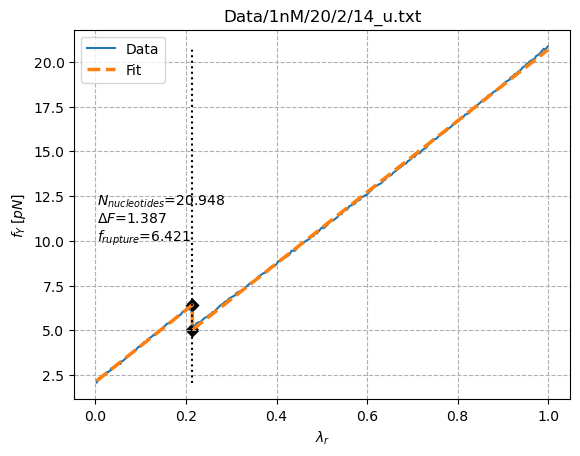

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.420595        5.033688  26.476213      20.947917  0.055236  0.06543   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.214028  20.082631  2.122358  19.914284  0.771481       2  


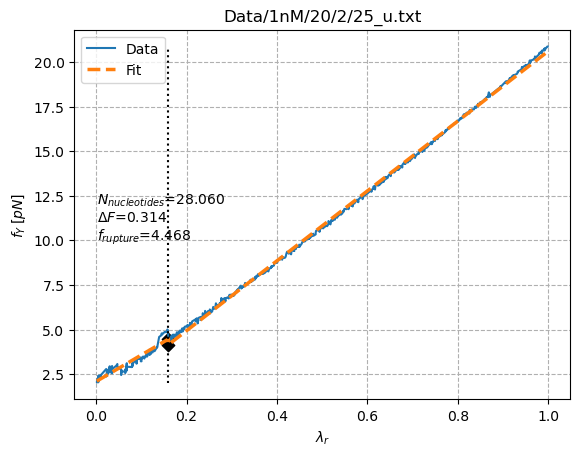

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides    k_eff     t_0  \
0   4.467817         4.15366  8.777997      28.060259  0.04109  0.1416   

        λ_0     a_pre     b_pre     a_post    b_post  N_fits  
0  0.159896  14.86918  2.090295  19.580169  1.022869       2  


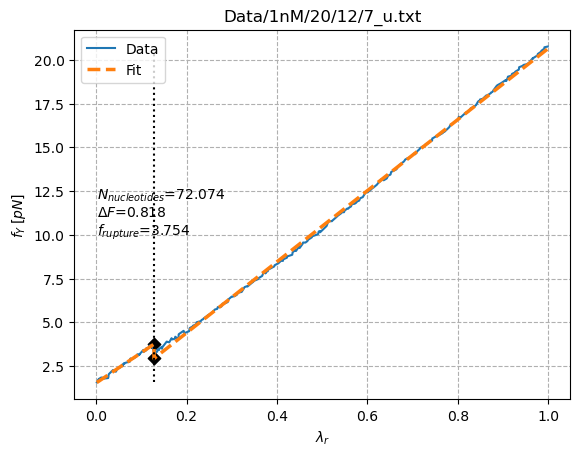

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0    3.75433        2.936711  20.759511      72.073551  0.041403  0.04422   

       λ_0     a_pre     b_pre     a_post    b_post  N_fits  
0  0.12797  17.33166  1.536403  20.310459  0.337588       2  


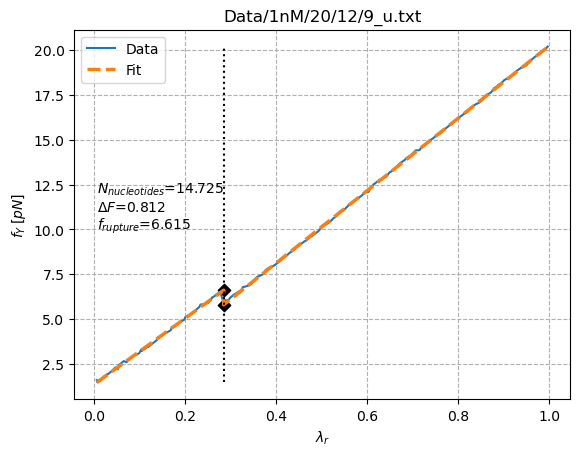

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.614984        5.802779  19.361762      14.724739  0.045181  0.04987   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.284236  18.443698  1.372615  20.162823  0.071773       2  


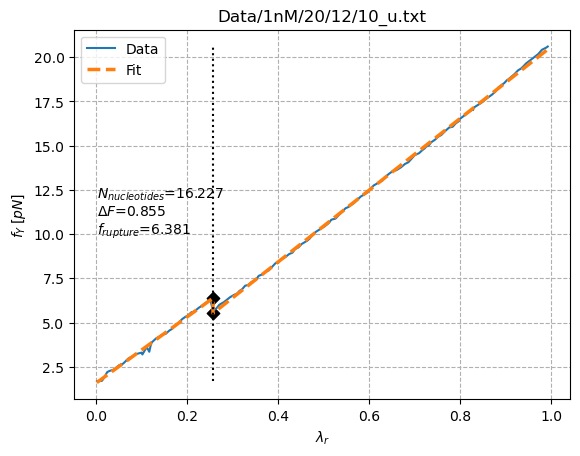

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.380584        5.525506  20.329313      16.226863  0.045086  0.04309   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.256665  18.686485  1.584422  20.275785  0.321427       2  


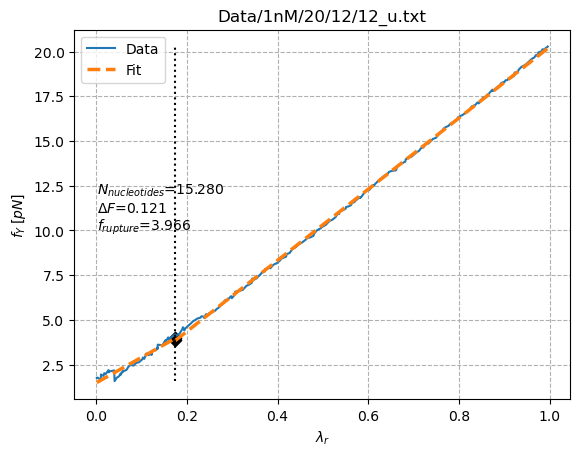

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides    k_eff      t_0  \
0   3.966114        3.844712  4.522395      15.280108  0.03496  0.06326   

        λ_0     a_pre     b_pre     a_post    b_post  N_fits  
0  0.174448  14.26717  1.477228  19.892435  0.374508       2  


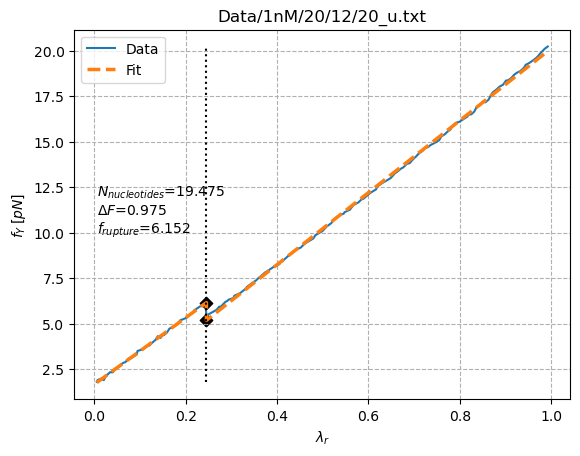

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.151719         5.17642  23.033098      19.475409  0.044963  0.04297   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.245225  18.294057  1.665567  19.783924  0.324916       2  


In [35]:
for ii, element in enumerate(path_re_analyze_U):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='u', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

The break point λ_0 [0.15872458354928645] could be smaller/higher than expected
or the rupture force [4.9219] smaller/higher than expected
χ² = [0.80563309 0.60650765]


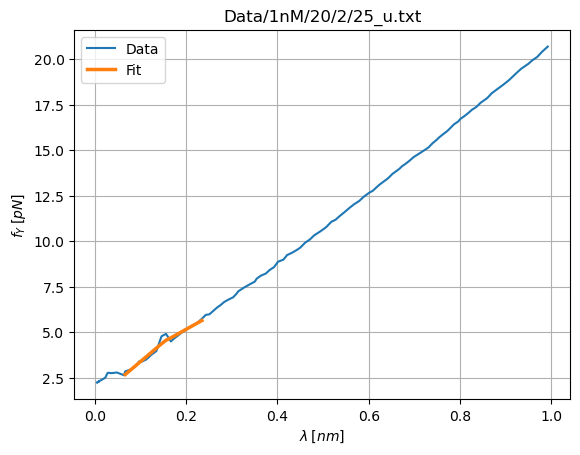

In [16]:
file = reading.readTxt(number=2, N=25, ty='u', graph=True)

In [17]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.9219,4.556692,7.415688,22.74134,0.7207,0.156144,21.256448,1.270134,14.007886,2.369444,2


In [18]:
reading.k_eff

0.05874144835728671

In [19]:
tot = 0
for i in all_molecules_f:
    tot += len(i)
tot # total number of experiments performed

198

In [20]:
molecules, all_molecules_f, all_molecules_u

([2, 12, 18, 21, 22],
 [[[[3.7983,
     3.2766602816674264,
     9.531010411916618,
     32.8969492126601,
     472.53028000000086]],
   [[3.9659,
     3.6539709503214706,
     8.512524319626461,
     28.762566998779917,
     480.7954149999996]],
   [[4.1003,
     3.8092259987594352,
     7.7149306463053176,
     25.654060838024243,
     489.3691400000007]],
   [[3.2275,
     3.0116290325207884,
     4.677067134544898,
     17.596544611611808,
     497.9589899999992]],
   [[4.9663,
     4.5474492335182415,
     16.293124842853143,
     49.780939714943166,
     506.06153000000086]],
   [[3.274,
     2.950143920919508,
     9.40218564620182,
     35.0938554556884,
     514.9965849999999]],
   [[4.9,
     4.568285925308659,
     12.906477220963424,
     39.65280320402843,
     522.7216800000006]],
   [[4.296,
     4.006518045314049,
     6.332396835004552,
     20.6041316549527,
     531.3408199999994]],
   [[0, 0, 0, 0, 610.3398500000003]],
   [[0, 0, 0, 0, 618.2177800000009]],
   [[3.65

In [21]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [38]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

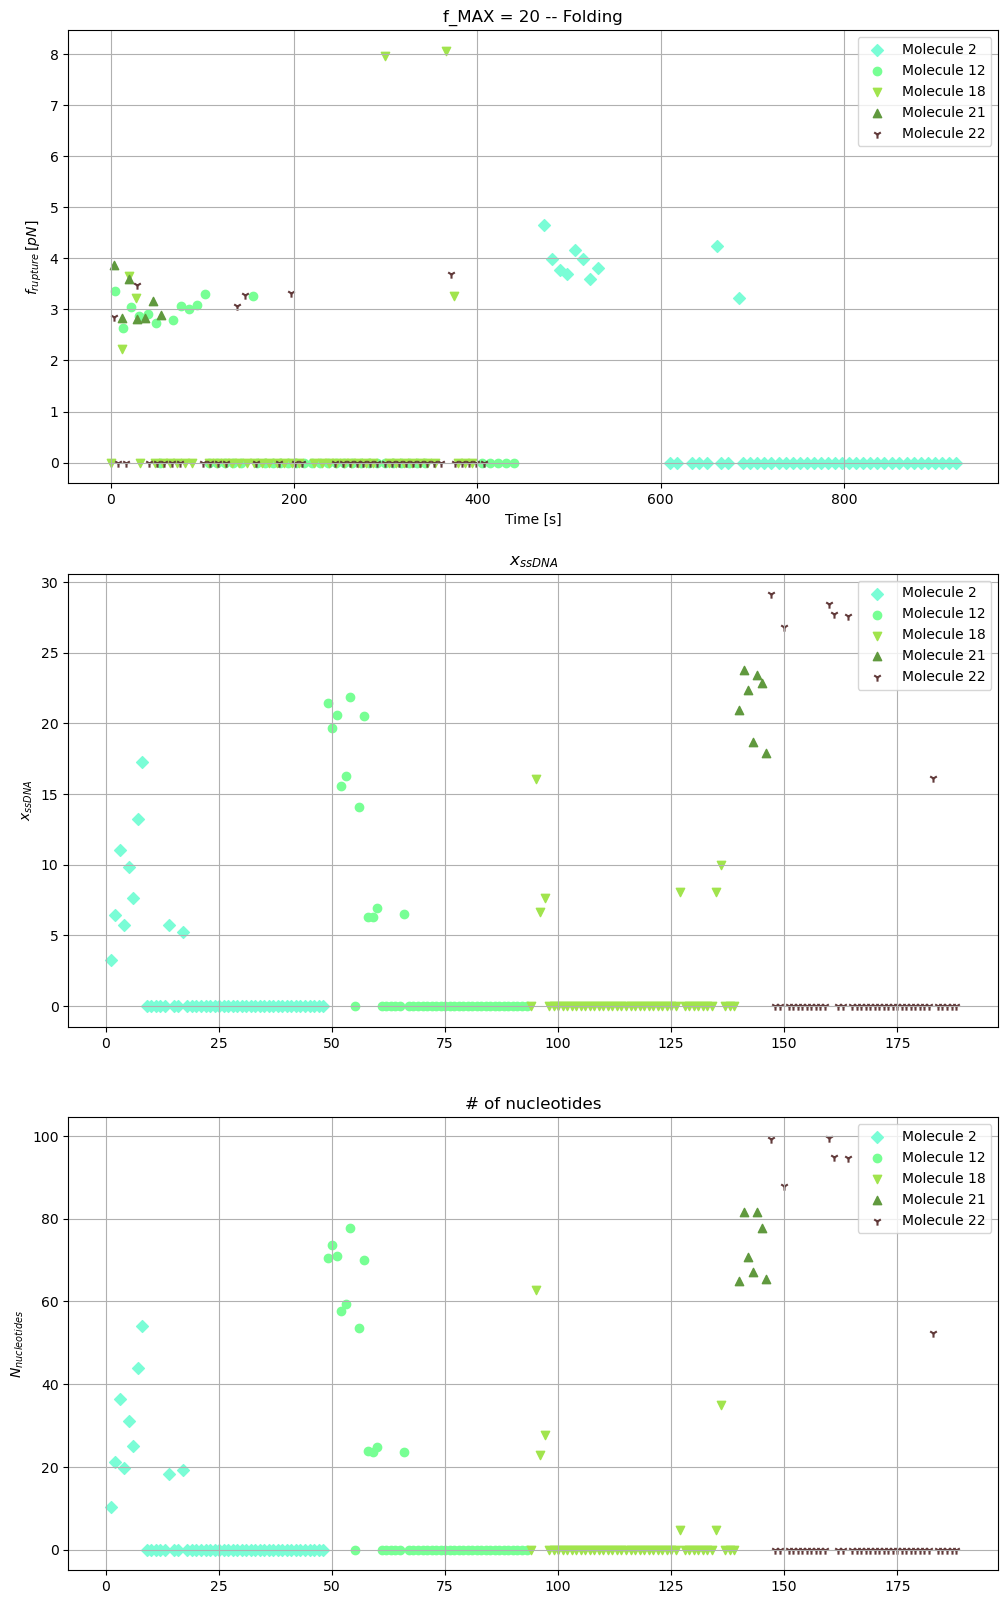

In [43]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, k_eff, t_0, _ = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

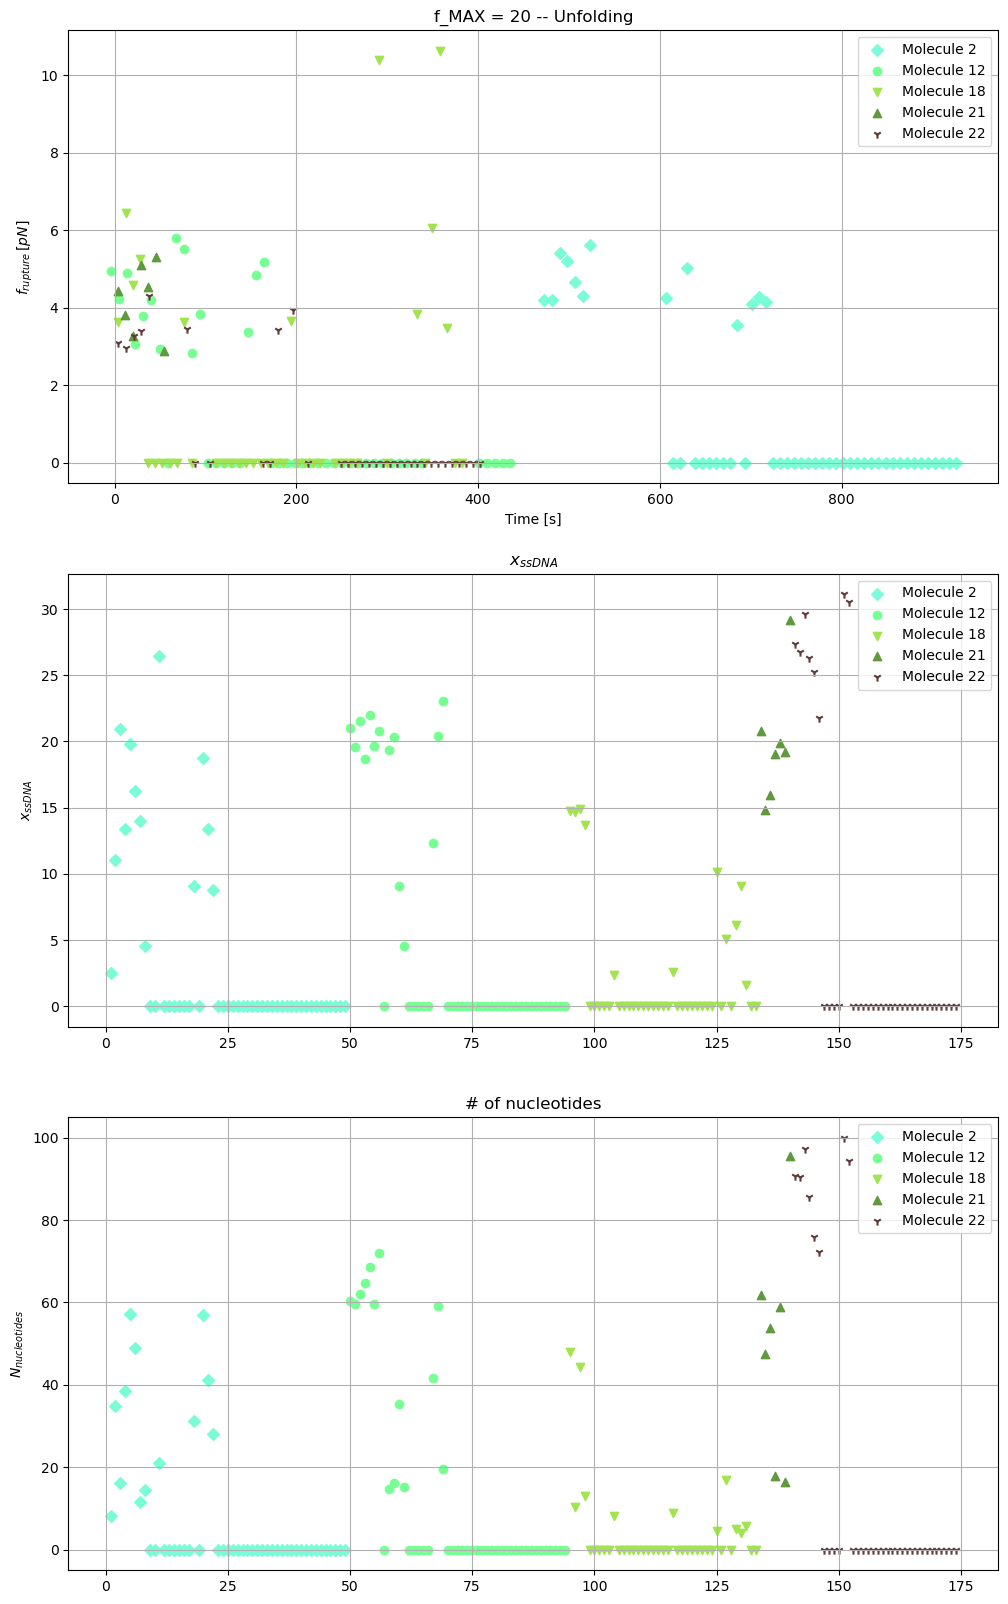

In [44]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, k_eff, t_0, _ = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Plots per single molecule

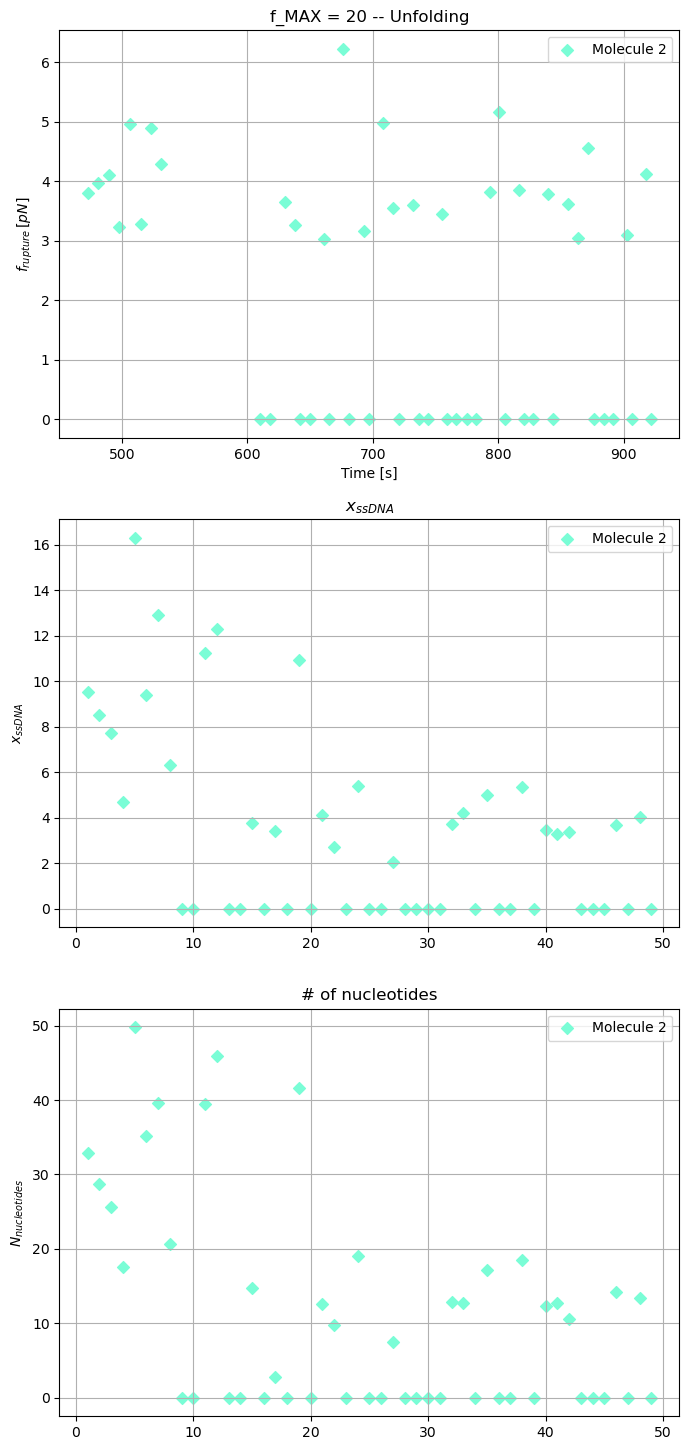

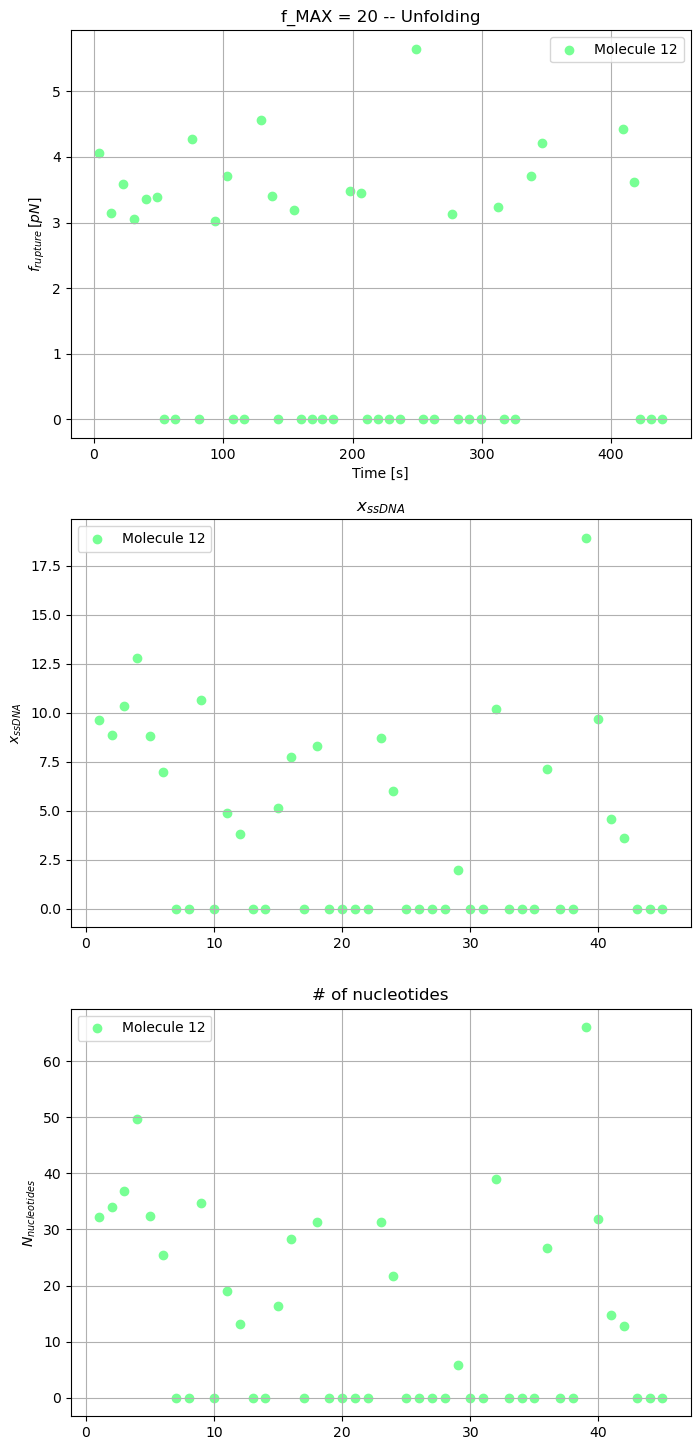

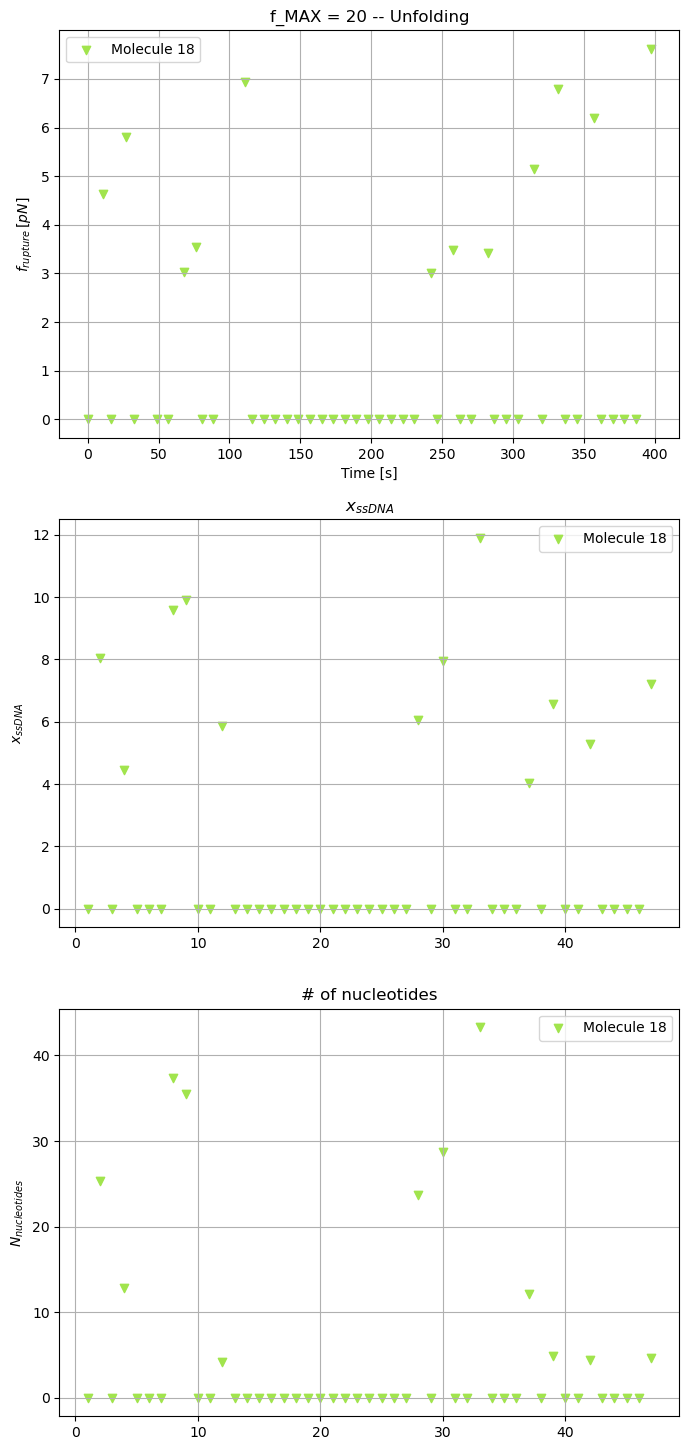

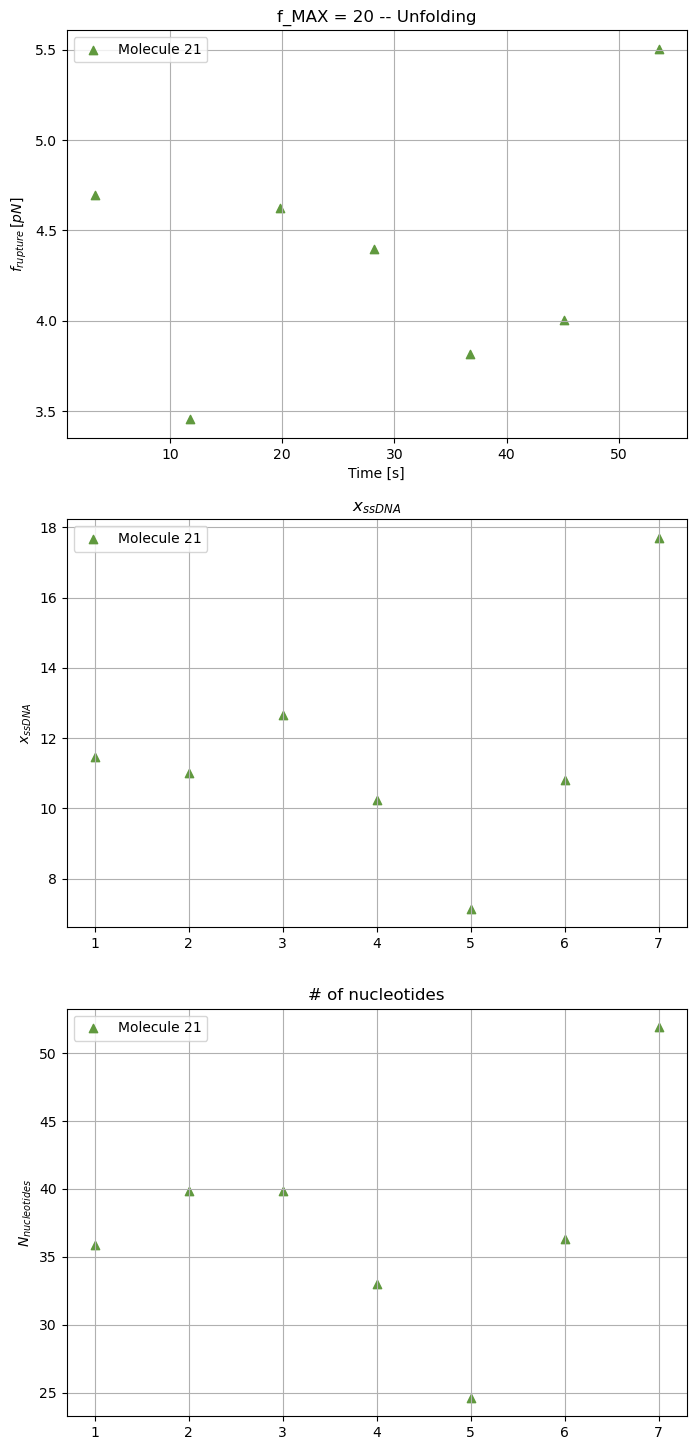

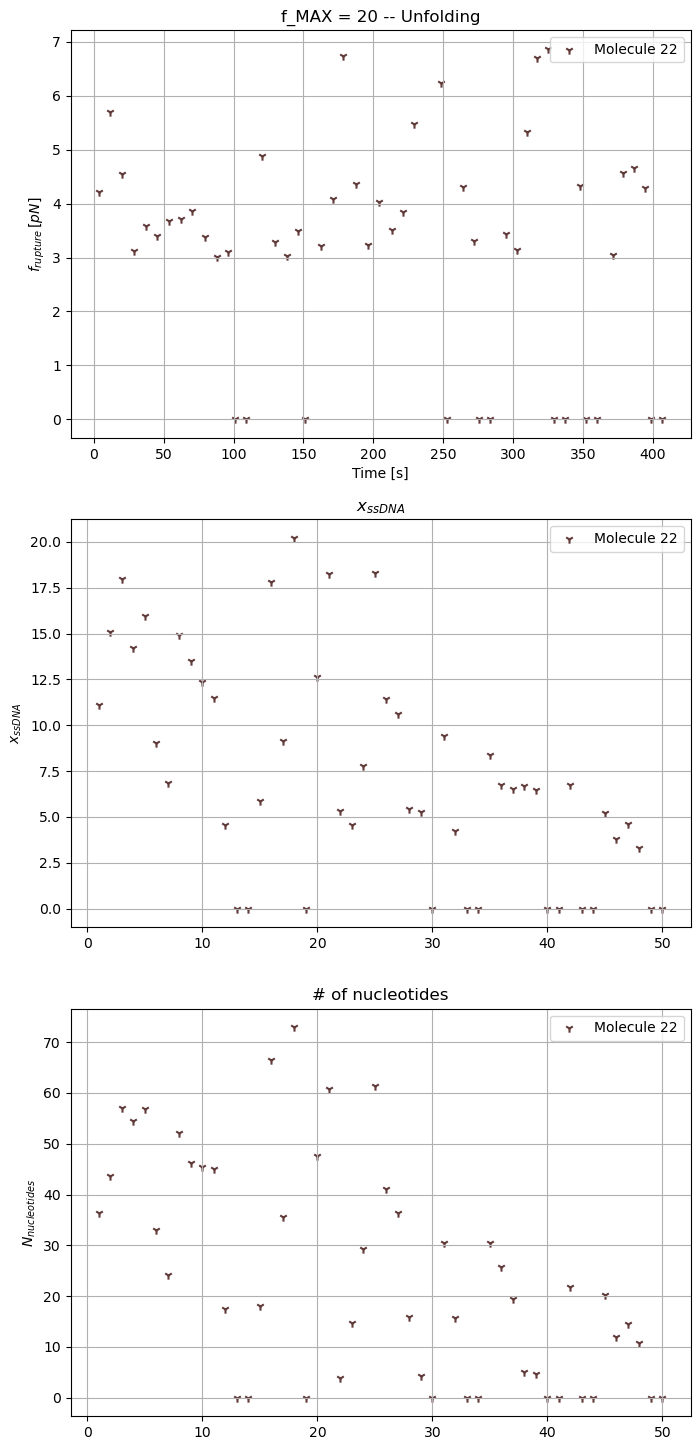

In [26]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

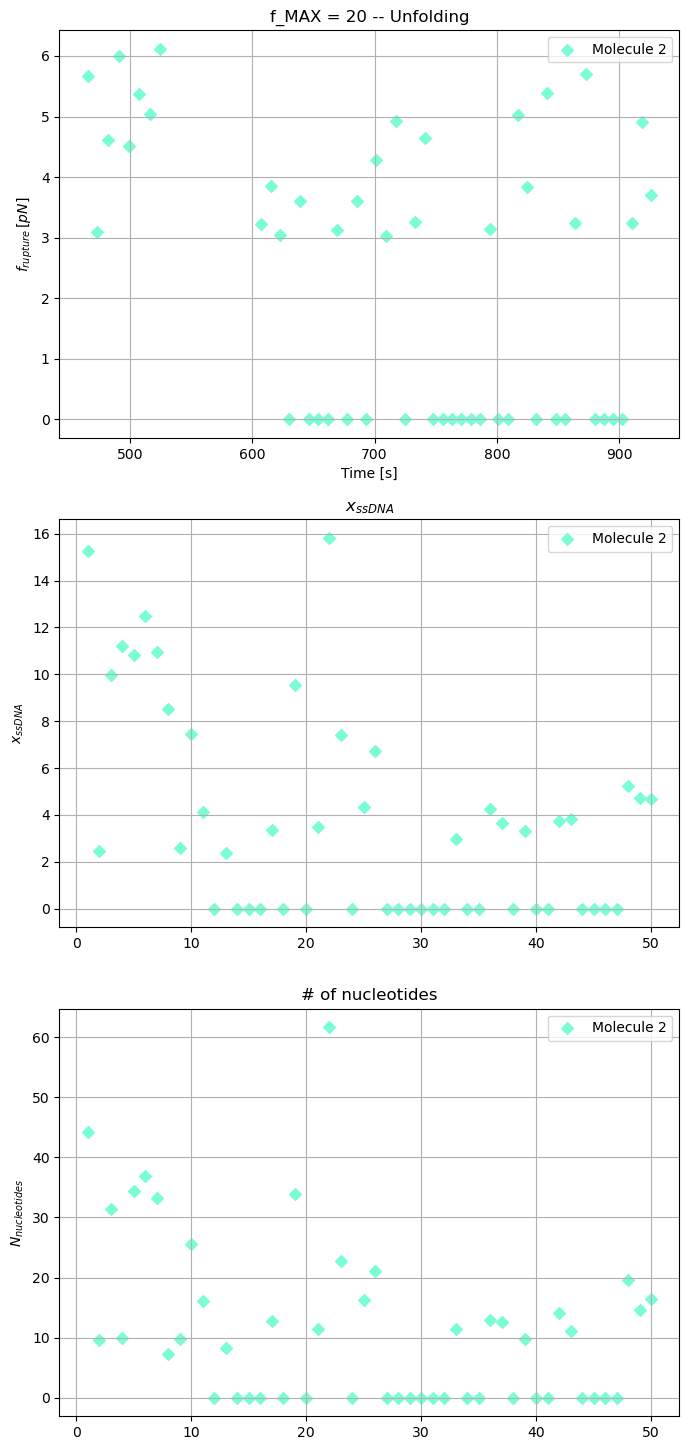

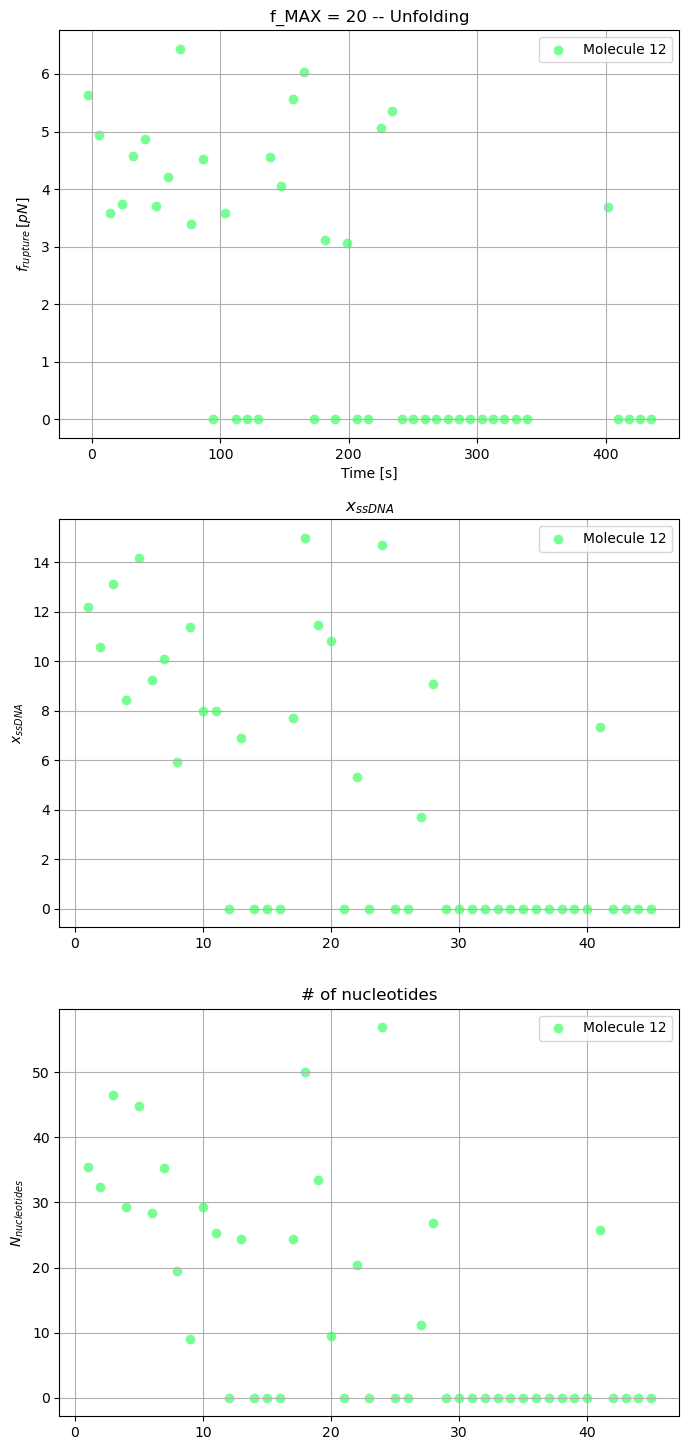

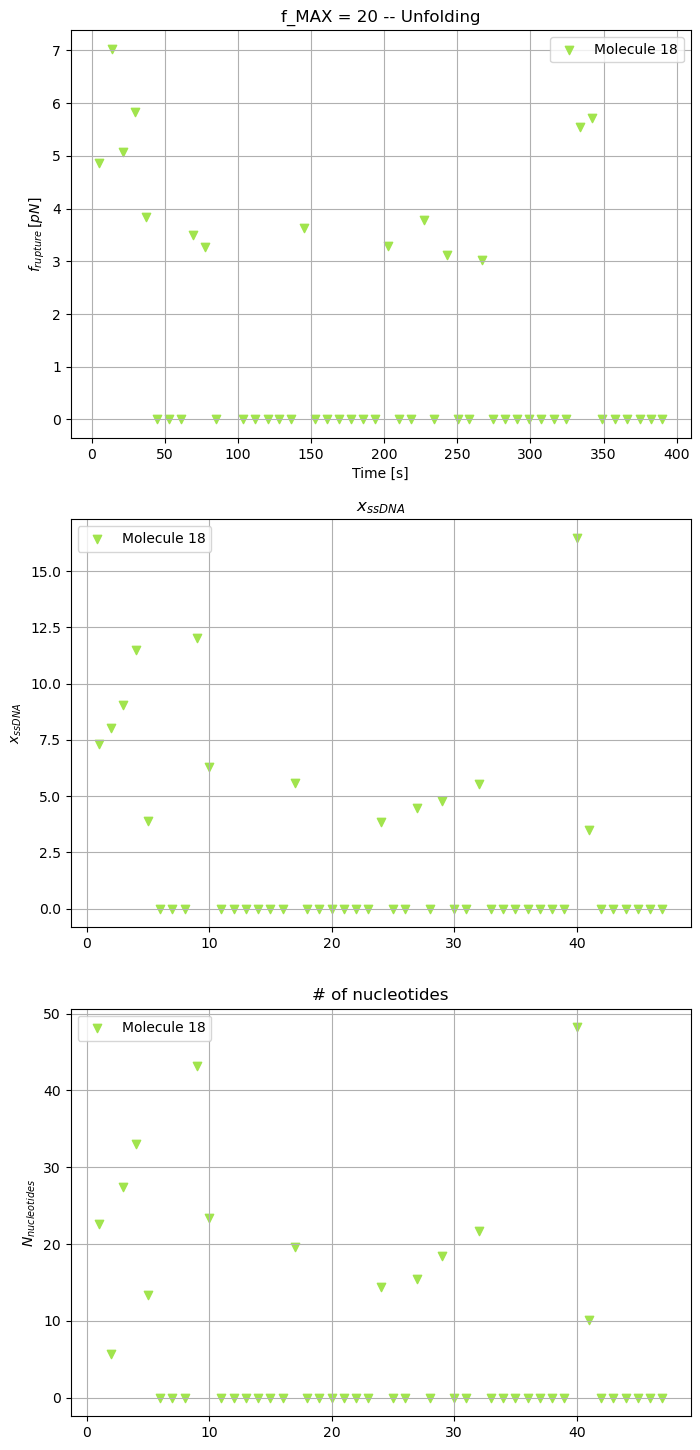

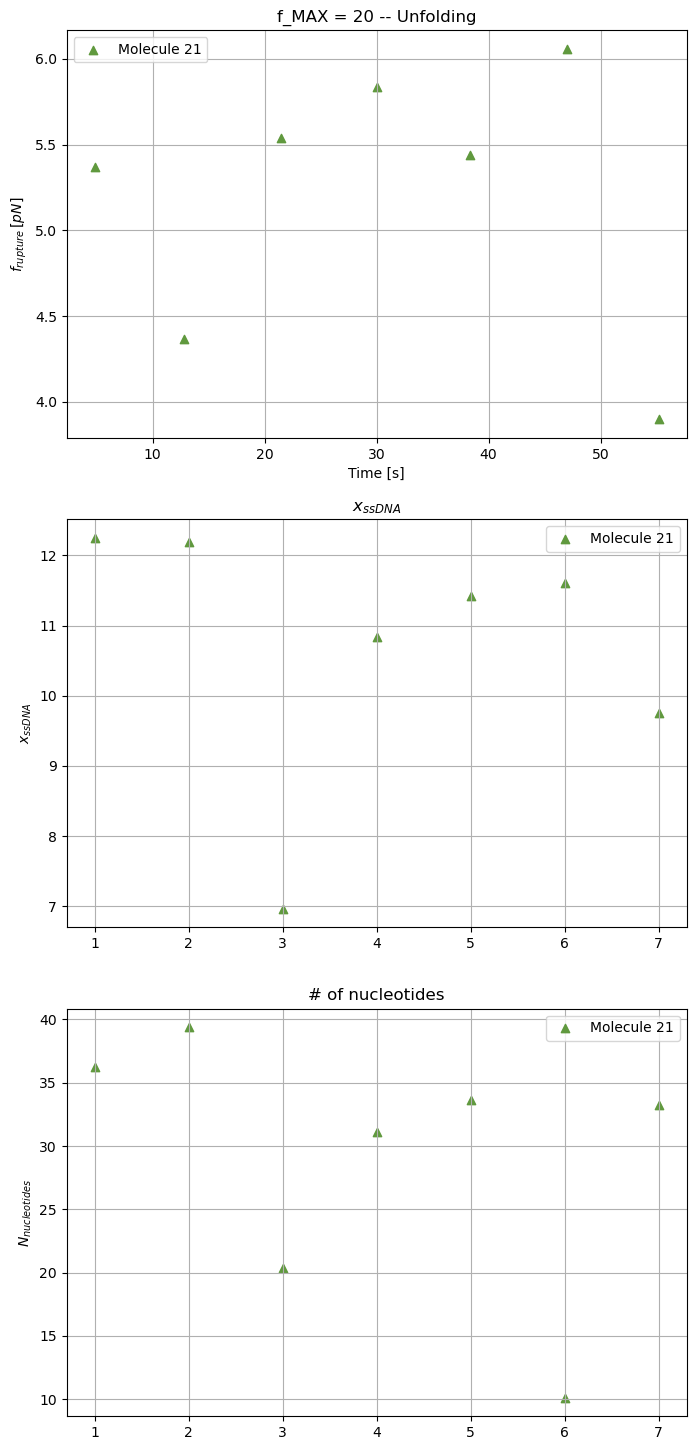

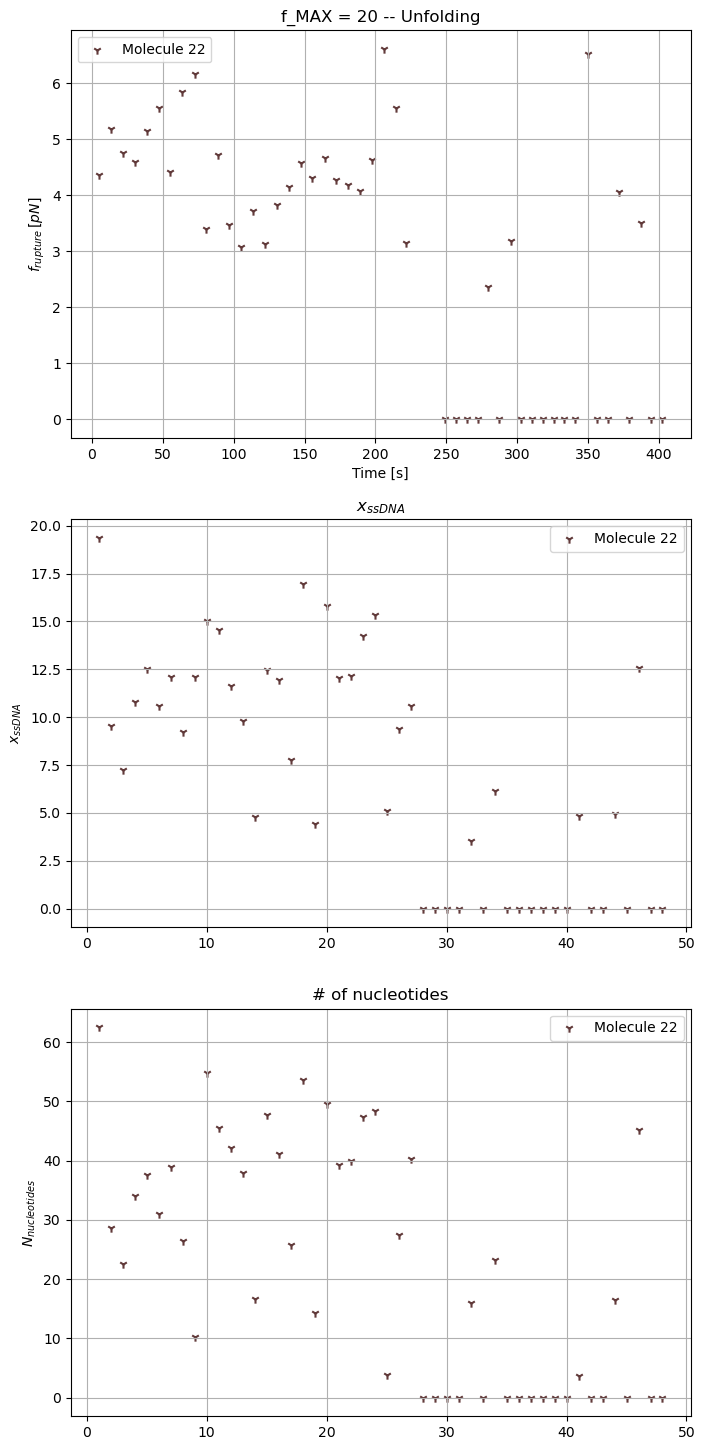

In [27]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()